In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(context='paper', style='whitegrid', rc={'figure.figsize':(21/2, 9/2), 'figure.dpi': 120})
color_palette = sns.color_palette("Set2")
sns.set_palette(color_palette)

seed_ = 20200218
np.random.seed(seed_)

import os
from PIL import Image

In [2]:
path_root = './data/'
paths = ['train', 'test', 'val']
cases = ["NORMAL", "PNEUMONIA"]

# 
## count file

move some file from train to val

In [3]:
count_file = []
for path in paths:
    for case in cases:
        d = {'split': path}
        files = os.listdir(f"{path_root}/{path}/{case}/")
        d['count'] = len(files)
        d['case'] = case
        count_file.append(d)

df = pd.DataFrame(count_file)
df

,split,count,case
0,train,1341,NORMAL
1,train,3875,PNEUMONIA
2,test,234,NORMAL
3,test,390,PNEUMONIA
4,val,8,NORMAL
5,val,8,PNEUMONIA


### Data imbalance
- เห็นว่าคนป่วยจะมากกว่าคนปกติ
- เป็นปกติในข้อมูลพวกการแพทย์ การกระจายคลาสข้อมูลจะไม่เท่ากัน (คนป่วยเยอะ/คนปกติเยอะ)


#### ref
[beating-everything-with-depthwise-convolution](https://www.kaggle.com/aakashnain/beating-everything-with-depthwise-convolution)

# 
## show images

In [29]:
path = f"./{path_root}/{paths[0]}/" 
case = cases[0]
files = os.listdir(path+case)
im = Image.open(f"{path}/{case}/{files[0]}")

In [30]:
arr_im = np.array(im)

In [31]:
im.size

(2090, 1858)

In [32]:
arr_im.shape

(1858, 2090)

> รูปภาพเป็นสีขาวดำ 1 CH 

- (height, width) ถ้าเป็น `np.array shape`
- (width, height) ถ้าเป็น `PIL image.size`

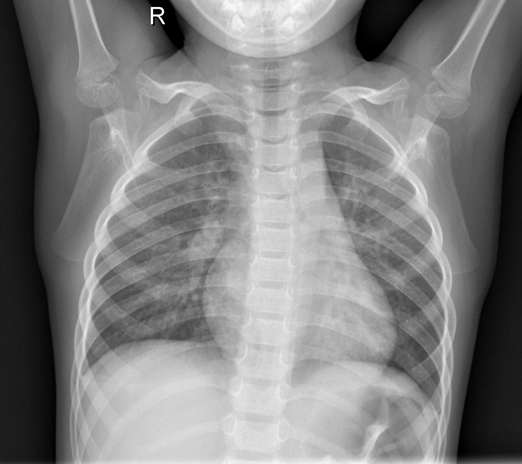

In [33]:
im.resize((np.array(im.size)//4).astype(int))